<a href="https://colab.research.google.com/github/HesusG/python-decision-making-support-analysis/blob/main/Minicase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MiniCase 2 - Linear Regression

Instructions:

Import necessary packages:

Start by importing the required packages for data analysis and visualization, including pandas, seaborn, and matplotlib. You can use the following import statements at the beginning of your code:

In [3]:
import seaborn as sns
import pandas as pd

# Include Any Additional Packages you need to import


# Load the "mpg" dataset from seaborn's GitHub repository
df = sns.load_dataset('mpg')

# Alternatively, you can load the "mpg" dataset directly from the UCI Machine Learning Repository:
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True, header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

# Print the first few rows of the dataset to verify that it's loaded correctly
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino



Explore the dataset by performing the following tasks:
Display the first few rows of the dataset using the head() function to verify its contents.


In [4]:
df.head(1)
df.head(2)
df.head(3)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite



Use the info() function to get an overview of the dataset, including column names, data types, and missing values.
Calculate summary statistics of the dataset using the describe() function.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Create a histogram of a numerical variable using seaborn's distplot() or matplotlib's hist() function to visualize its distribution.


(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

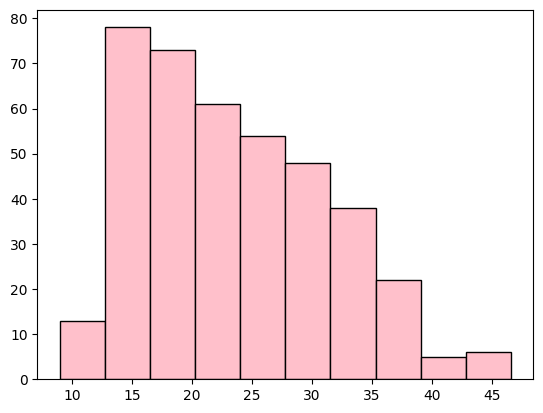

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset("mpg")
df.head()
df.describe().T
plt.hist(df['mpg'], color="pink", ec="black")



Create a scatter plot of two numerical variables using seaborn's scatterplot() or matplotlib's scatter() function to identify any potential relationships.

<Axes: xlabel='weight', ylabel='displacement'>

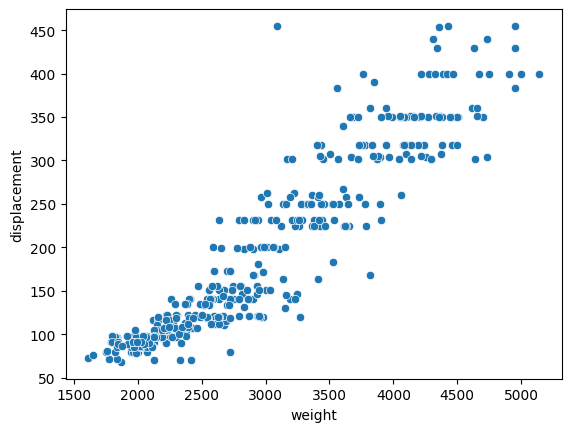

In [7]:
df.describe().T
sns.scatterplot(data=df, x='weight', y='displacement')

Use appropriate axes labels, titles, and legends to enhance the readability of your visualizations.


In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Create a pairplot


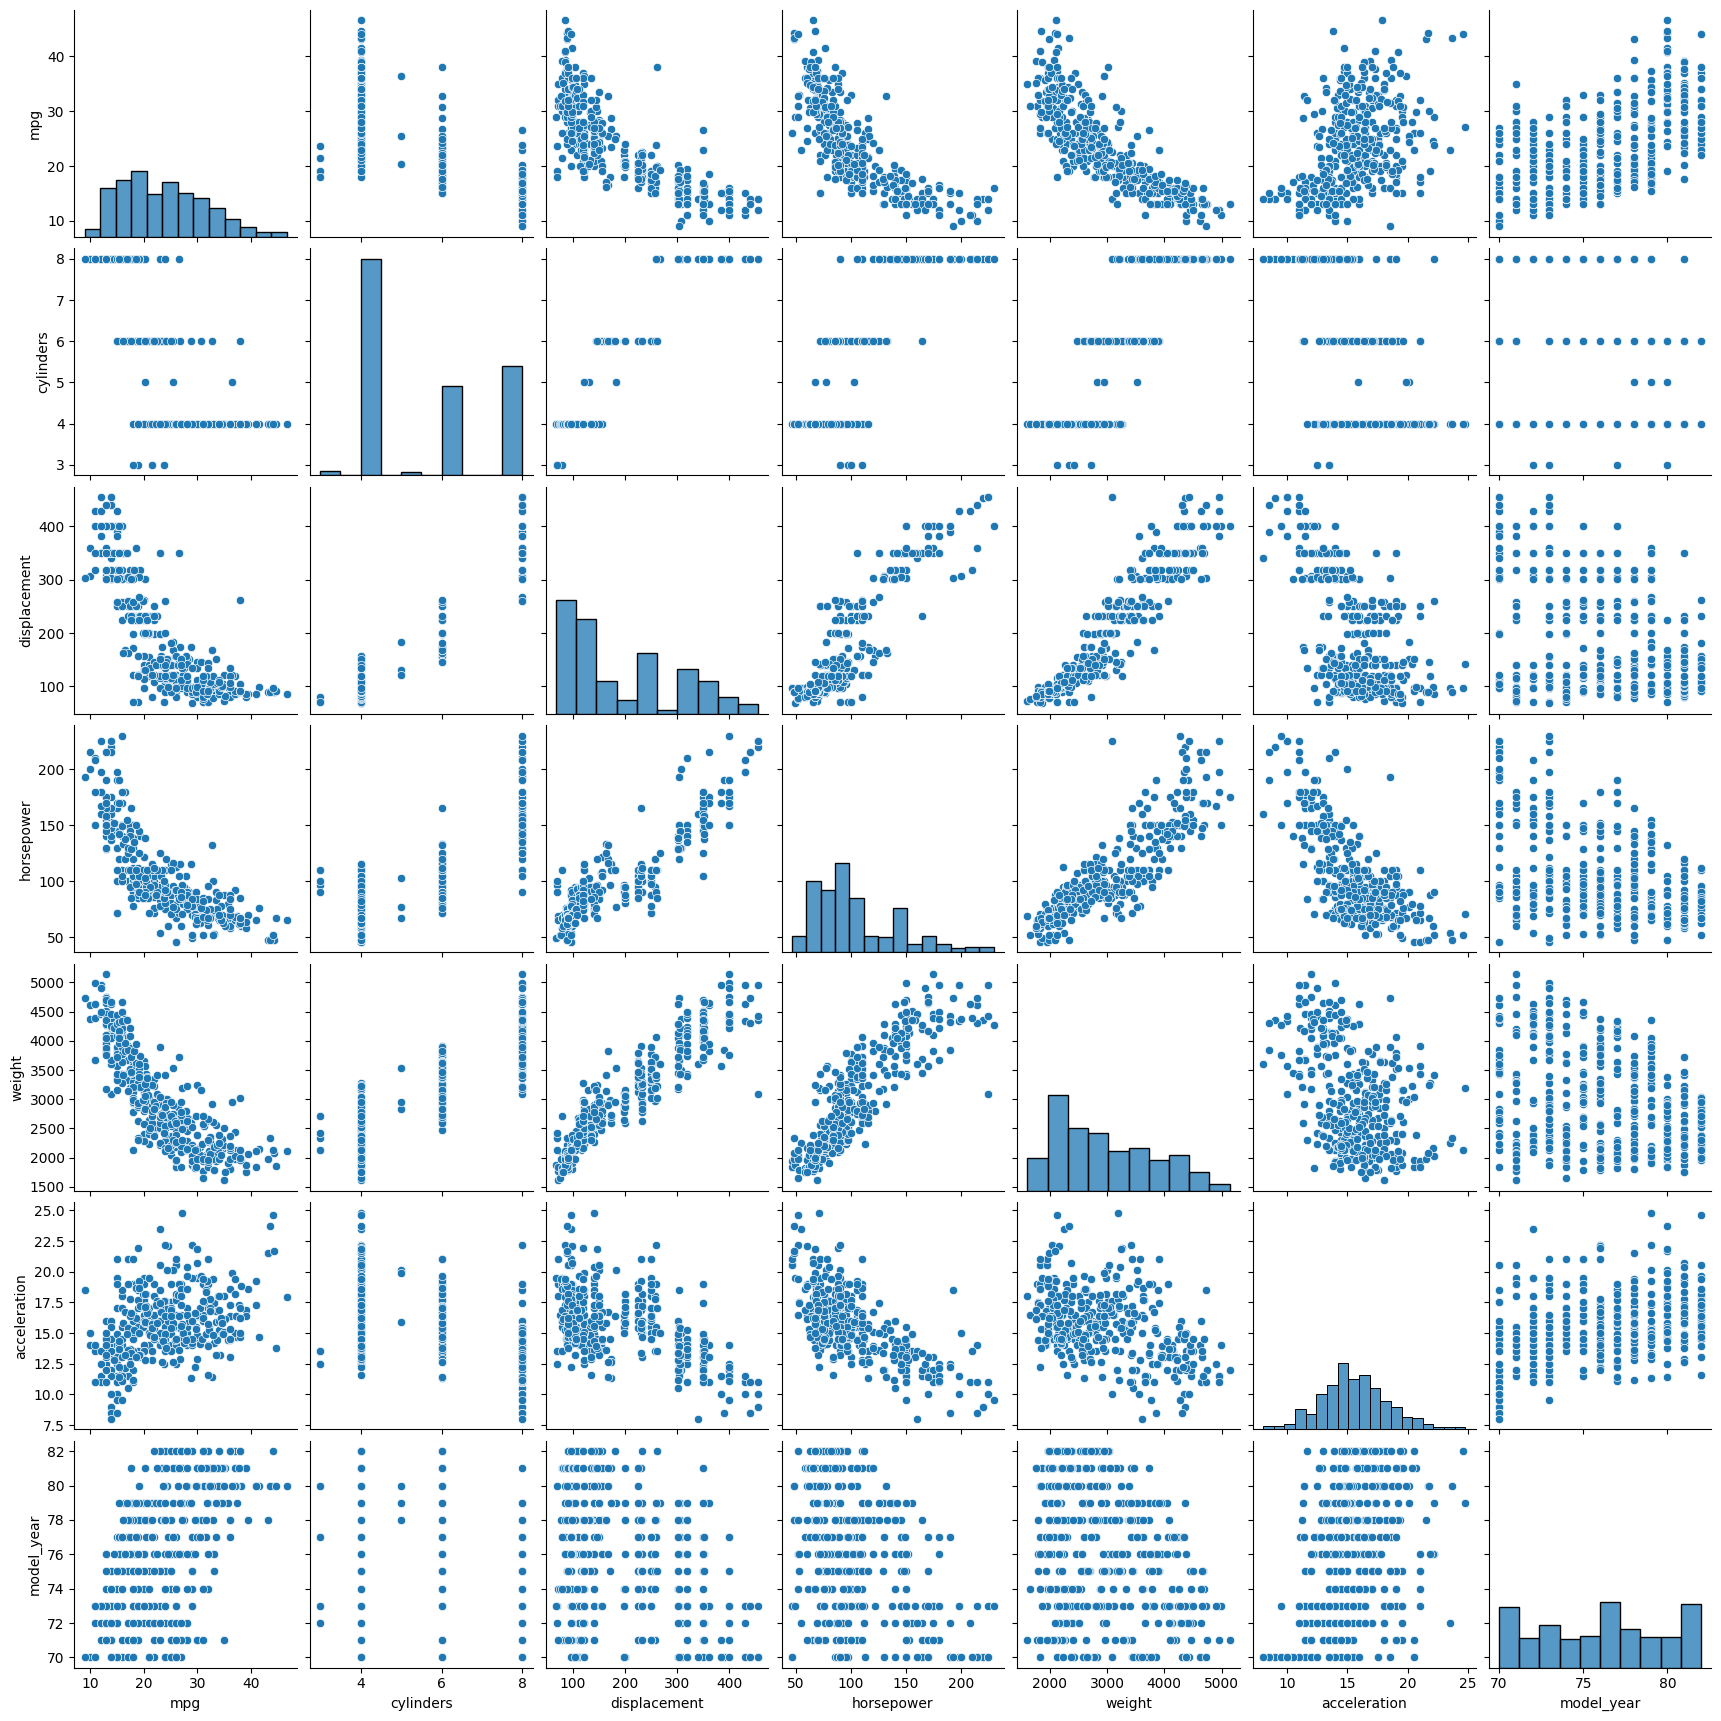

In [9]:
sns.pairplot(df)
plt.show()

Identify candidates for linear regression:

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


Perform a correlation matrix:

<ipython-input-11-840b24238bc6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap= "coolwarm")


<Axes: >

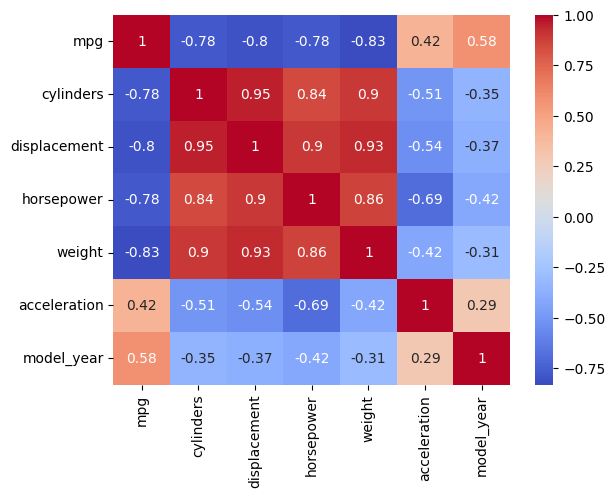

In [11]:
sns.heatmap(df.corr(), annot=True, cmap= "coolwarm")

Identify two numerical variables that seem to exhibit a linear relationship. Note down the names of these variables, as they will be used for implementing linear regression.

In a linear relationship, the variables move in the same direction at a constant rate, that's why we chose:


*   Weight
*   Horsepower

Choose one independent variable (X) and one dependent variable (y) from the identified candidates for linear regression.
Separate the chosen variables from the DataFrame and store them in separate variables, such as X and y.

In [12]:
X= df.weight.fillna(df.weight.mean())
y= df.horsepower.fillna(df.horsepower.mean())

Create an instance of the linear regression model using statsmodels LinearRegression() class. Assign it to a variable, such as model.

In [13]:
import statsmodels.api as sm
model = sm.OLS(X,y).fit()

Use the model to make predictions on the test data using the predict() method, passing in X_test as an argument.

In [14]:
y_pret = model.predict(y)

Good luck with your assignment!

<Axes: xlabel='weight'>

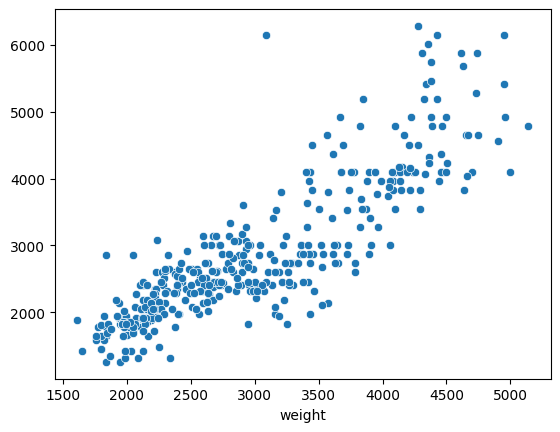

In [15]:
sns.scatterplot(x=X,y=y_pret)

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 weight   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          1.231e+04
Date:                Tue, 13 Jun 2023   Prob (F-statistic):                   6.34e-301
Time:                        23:25:23   Log-Likelihood:                         -3073.1
No. Observations:                 398   AIC:                                      6148.
Df Residuals:                     397   BIC:                                      6152.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower    27.3326      0.246    110.960      0.000      26.848      27.817
==============================================================================
Omnibus:                       99.050   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.162
Skew:                          -1.075   Prob(JB):                     4.57e-78
Kurtosis:                       7.106   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""